### 引入所有需要用到的第三方库

In [1]:
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as sp
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import time

### 定义数据清洗处理函数

In [2]:
def data_clean(df):
    # 去除大量为空值的列
    df = df.drop(labels=['campaign_disc_ele', 'forecast_bill_12m', 'date_first_activ', 'forecast_cons',
                         'forecast_base_bill_ele', 'forecast_base_bill_year', 'activity_new', 'channel_sales'], axis=1)
    # 去除对结果没有什么实际意义与影响的列
    df = df.drop(labels=['id', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal'], axis=1)
    # 获取列名
    new_col = df.columns
    # 众数填充空值
    imp = SimpleImputer(strategy='most_frequent')
    imp.fit(df)
    df = imp.transform(df)
    df = pd.DataFrame(df)
    df.columns = new_col
    # 对离散标签编码成数值型
    spl = sp.LabelEncoder()
    df['origin_up'] = spl.fit_transform(df['origin_up'])
    df['has_gas'] = spl.fit_transform(df['has_gas'])
    return df

### 读取数据并拼接标签，然后清洗

In [3]:
df = pd.read_csv('ml_case_training_data.csv')
df1 = pd.read_csv('ml_case_training_output.csv')
df['churn'] = df1['churn']
df

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


In [4]:
hist = pd.read_csv('ml_case_training_hist_data.csv')
new_col = hist.columns
# 众数填充空值
imp = SimpleImputer(strategy='most_frequent')
imp.fit(hist)
hist = imp.transform(hist)
hist = pd.DataFrame(hist)
hist.columns = new_col
hist = hist.groupby('id',as_index=False).mean()
hist

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28152\2499814869.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  hist = hist.groupby('id',as_index=False).mean()


,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678


In [5]:
df = pd.merge(df,hist,on=['id'],how='inner')
df = data_clean(df)
df

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,num_years_antig,origin_up,pow_max,churn,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,309275,0,10025,26520.3,10025,0.0,359.29,0.095919,0.088347,58.995952,...,3,2,180.0,0,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051
1,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,...,3,3,43.648,1,0.125321,0.093626,0.06653,40.95708,22.35201,14.90134
2,4660,0,0,189.95,0,0.0,16.27,0.145711,0.0,44.311378,...,6,1,13.8,0,0.150143,0.0,0.0,44.32619,0.0,0.0
3,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,...,6,1,13.856,0,0.170512,0.088421,0.0,44.38545,0.0,0.0
4,1584,0,0,240.04,0,0.0,19.83,0.146694,0.0,44.311378,...,6,1,13.2,0,0.15121,0.0,0.0,44.400265,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,32270,47940,0,4648.01,0,0.0,18.57,0.138305,0.0,44.311378,...,4,3,15.0,0,0.144124,0.0,0.0,44.370635,0.0,0.0
16092,7223,0,181,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,...,3,3,6.0,1,0.106799,0.095406,0.070817,59.015674,36.393379,8.345418
16093,1844,0,179,190.39,179,0.0,129.6,0.1169,0.100015,40.606701,...,4,3,15.935,1,0.124338,0.103794,0.07316,40.701732,24.421038,16.280694
16094,131,0,0,19.34,0,0.0,7.18,0.145711,0.0,44.311378,...,3,3,11.0,0,0.150143,0.0,0.0,44.32619,0.0,0.0


### 大致查看一些特征情况

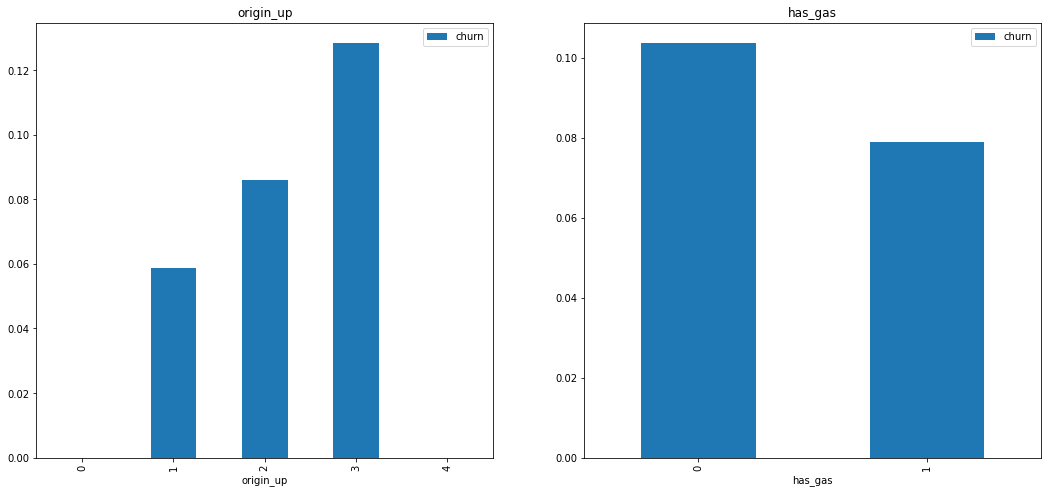

In [6]:
# 不同origin_up和has_gas列下的客户流失率
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['origin_up','churn']].groupby(['origin_up']).mean().plot.bar(ax=ax[0])
ax[0].set_title('origin_up')
df[['has_gas','churn']].groupby(['has_gas']).mean().plot.bar(ax=ax[1])
ax[1].set_title('has_gas')
plt.show()

### 分隔X,Y，并且以8比2划分训练集和测试集


In [7]:
Y = df['churn'].astype('int')
X = df.drop(labels=['churn'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### 使用测试集预测，计算准确度

### 用不同的模型进行拟合，并计算准确度,绘制ROC曲线

Accuracy: 0.9071428571428571


C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Text(0, 0.5, 'TPR')

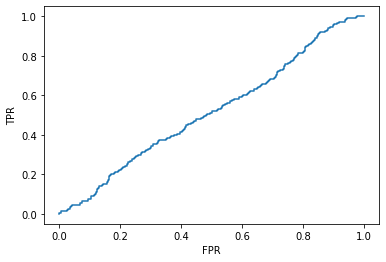

In [8]:
model = LogisticRegression(solver='saga')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
Churn_prediction = y_pred
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
fpr,tpr, thresholds = roc_curve(y_test,model.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')

Accuracy: 0.8307453416149069


Text(0, 0.5, 'TPR')

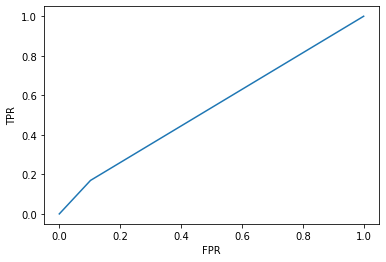

In [9]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
Churn_prediction = y_pred
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
fpr,tpr, thresholds = roc_curve(y_test,model.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')

Accuracy: 0.9130434782608695


Text(0, 0.5, 'TPR')

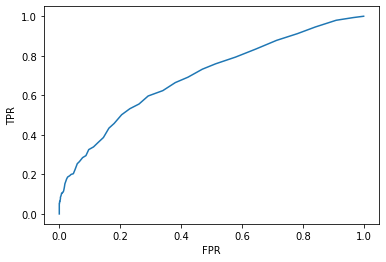

In [10]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
Churn_prediction = y_pred
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
fpr,tpr, thresholds = roc_curve(y_test,model.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')

### 绘制ROC曲线

### 读取实际预测集，利用训练好的模型预测

In [11]:
df = pd.read_csv('ml_case_test_data.csv')
hist = pd.read_csv('ml_case_test_hist_data.csv')
new_col = hist.columns
# 众数填充空值
imp = SimpleImputer(strategy='most_frequent')
imp.fit(hist)
hist = imp.transform(hist)
hist = pd.DataFrame(hist)
hist.columns = new_col
hist = hist.groupby('id',as_index=False).mean()
df = pd.merge(df,hist,on=['id'],how='inner')
df = data_clean(df)
y_pred = model.predict(df)
y_pred_proba = model.predict_proba(df)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28152\2260279145.py:10: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  hist = hist.groupby('id',as_index=False).mean()


### 分别在输出模板中输出分类结果和分类概率

In [12]:
df = pd.read_csv('ml_case_test_output_template.csv',index_col=[0])
df['Churn_prediction'] = y_pred
df['Churn_probability'] = y_pred_proba[:,1]
df.to_csv('ml_case_test_output.csv')